In [29]:
import keras

In [30]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [31]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [32]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [33]:
base_dir = 'D:/Sunil/sunil_conda/t81_558_deep_learning-master/t81_558_deep_learning-master/data/cats_and_dogs_small'

In [34]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
cat_dir=os.path.join(base_dir, 'cat')

In [35]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [41]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [48]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
train_features.shape

(2000, 4, 4, 512)

In [50]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [51]:
train_features.shape

(2000, 8192)

In [39]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 23s 12ms/step - loss: 0.6096 - acc: 0.6585 - val_loss: 0.4588 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.4259 - acc: 0.8135 - val_loss: 0.3671 - val_acc: 0.8670
Epoch 3/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.3657 - acc: 0.8435 - val_loss: 0.3239 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3217 - acc: 0.8595 - val_loss: 0.3018 - val_acc: 0.8780
Epoch 5/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2875 - acc: 0.8790 - val_loss: 0.2836 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2629 - acc: 0.8920 - val_loss: 0.2774 - val_acc: 0.8980
Epoch 7/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2471 - acc: 0.9005 - val_loss: 0.2628 - val_acc: 0.8920
Epoch 8/30


In [45]:
train_labels.shape

(2000,)

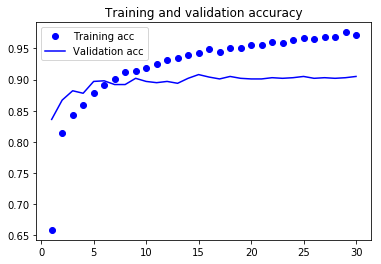

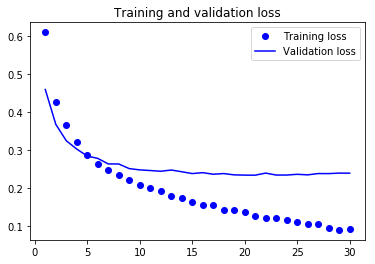

In [40]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [142]:
model.save('cats_and_dogs_small_feature.h5')

In [161]:
cat_dir=os.path.join(base_dir, 'cat')

In [162]:
cat_dir

'D:/Sunil/sunil_conda/t81_558_deep_learning-master/t81_558_deep_learning-master/data/cats_and_dogs_small\\cat'

In [165]:
cat_features,labels= extract_features(cat_dir, 1)

Found 1 images belonging to 1 classes.


In [166]:
cat_features.shape

(1, 4, 4, 512)

In [167]:
cat_features = np.reshape(cat_features, (1, 4 * 4 * 512))

In [170]:
cat_features.shape

(1, 8192)

In [168]:
prediction = model.predict_classes(cat_features, batch_size=1)
if prediction == ([[1]]):
    print("This is a picture of dog")
if prediction ==([[0]]):
    print("This is a picture of cat")

This is a picture of cat


In [169]:
prediction

array([[0]])

In [148]:
import pickle
import os 
dest = os.path.join('image', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(model,open(os.path.join(dest,'model.pkl'),'wb'),protocol=4)